In [55]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df = pd.read_csv('C:/Users/yakul/mutipage/data/month.csv',index_col='Date',parse_dates=True)
df.index.frequency='MS'


In [57]:
df

,Sale
Date,
2016-01-01,155600
2016-02-01,199620
2016-03-01,150100
2016-04-01,141560
2016-05-01,165800
...,...
2021-11-01,138110
2021-12-01,118000
2022-01-01,176665


In [58]:
df.shape

(75, 1)

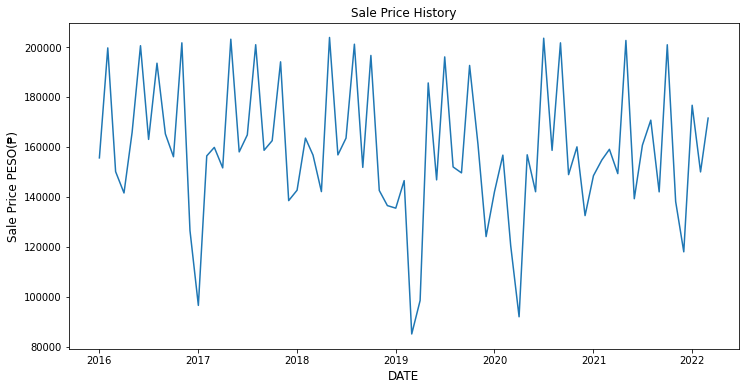

In [59]:
plt.figure(figsize=(12,6))
plt.title('Sale Price History')
plt.plot(df['Sale'])
plt.xlabel('DATE', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.show()

In [60]:
data = df.filter(['Sale'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .7)
training_data_len

53

In [61]:
ma12 = df.Sale.rolling(12).mean()
ma12

Date
2016-01-01              NaN
2016-02-01              NaN
2016-03-01              NaN
2016-04-01              NaN
2016-05-01              NaN
                  ...      
2021-11-01    158189.166667
2021-12-01    156980.833333
2022-01-01    159330.416667
2022-02-01    158932.916667
2022-03-01    159974.166667
Name: Sale, Length: 75, dtype: float64

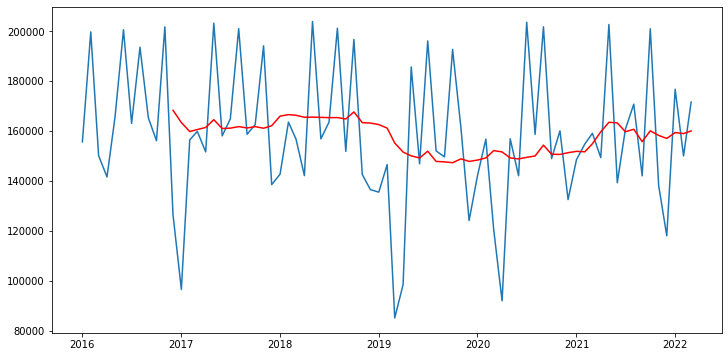

In [62]:
plt.figure(figsize = (12,6))
plt.plot(df.Sale)
plt.plot(ma12, "r")

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.59386586],
       [0.96477924],
       [0.54752275],
       [0.47556454],
       [0.67981126],
       [0.97219414],
       [0.6562184 ],
       [0.913212  ],
       [0.67475565],
       [0.59774183],
       [0.98188406],
       [0.34871082],
       [0.09639366],
       [0.60060667],
       [0.62925514],
       [0.56016178],
       [0.99410179],
       [0.6140883 ],
       [0.67138524],
       [0.97556454],
       [0.61948096],
       [0.65200539],
       [0.91784631],
       [0.44978092],
       [0.48483316],
       [0.66059993],
       [0.60313448],
       [0.48011459],
       [1.        ],
       [0.60397708],
       [0.66043141],
       [0.97724975],
       [0.56184698],
       [0.93933266],
       [0.4839063 ],
       [0.43292888],
       [0.42433434],
       [0.51718908],
       [0.        ],
       [0.11274014],
       [0.84664644],
       [0.51971689],
       [0.93444557],
       [0.56336367],
       [0.54330974],
       [0.90562858],
       [0.63953488],
       [0.328

In [80]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(12, len(train_data)):
  x_train.append(train_data[i-12:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 12:
    print(x_train)
    print(y_train)
    print()

[array([0.59386586, 0.96477924, 0.54752275, 0.47556454, 0.67981126,
       0.97219414, 0.6562184 , 0.913212  , 0.67475565, 0.59774183,
       0.98188406, 0.34871082])]
[0.09639366363329971]



In [81]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [82]:
x_train.shape

(41, 12)

In [83]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(41, 12, 1)

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [85]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [86]:
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(x_train, y_train, batch_size=1, epochs=50)

Epoch 1/50
41/41 [==============================] - 3s 10ms/step - loss: 0.1090
Epoch 2/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0771
Epoch 3/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0728
Epoch 4/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0763
Epoch 5/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0715
Epoch 6/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0738
Epoch 7/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0810
Epoch 8/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0654
Epoch 9/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0719
Epoch 10/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0673
Epoch 11/50
41/41 [==============================] - 0s 8ms/step - loss: 0.0668
Epoch 12/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0657
Epoch 13/50
41/41 [=============================

In [97]:
test_data = scaled_data[training_data_len -12: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(12, len(test_data)):
  x_test.append(test_data[i -12:i,0])

In [98]:
x_test = np.array(x_test)

In [99]:
x_test.shape

(22, 12)

In [100]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [101]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 23ms/step


In [102]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

5275.300426136364

C:\Users\yakul\AppData\Local\Temp\ipykernel_8408\3799530347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction['Predictions'] = predictions


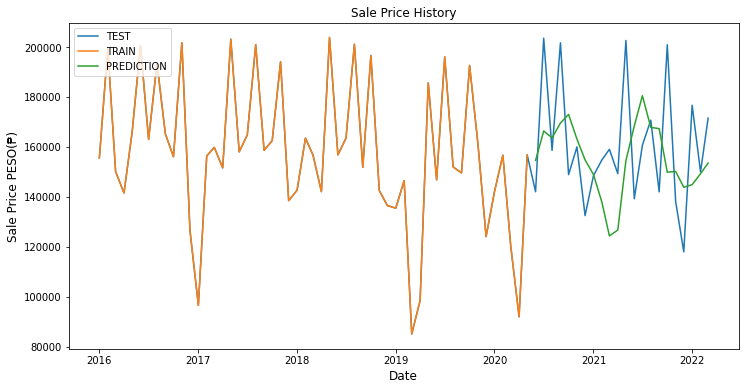

In [103]:
train = data[:training_data_len]
prediction = data[training_data_len:]
prediction['Predictions'] = predictions
plt.figure(figsize=(12,6))
plt.title('Sale Price History')
plt.plot(df)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sale Price PESO(₱)', fontsize = 12)
plt.plot(train['Sale'])
plt.plot(prediction[[ 'Predictions']])
plt.legend(['TEST','TRAIN','PREDICTION'], loc = 'upper left')
plt.show()


In [105]:
month = pd.read_csv('C:/Users/yakul/mutipage/data/year.csv', index_col='Date',parse_dates=True)
df.index.frequency='MS'
newdf = month.filter(['Sale'])
last_12_years = newdf[-12:].values
last_12_years_scaled = scaler.transform(last_12_years)
X_test = [] 
X_test.append(last_12_years)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_sale = model.predict(X_test)
pred_sale = scaler.inverse_transform(pred_sale)
print(pred_sale)

1/1 [==============================] - 1s 671ms/step
[[235211.95]]
